In [13]:
import numpy as np
import pandas as pd
import requests, warnings
import datetime
import statsmodels.api as sm
from datetime import datetime as dt
from dateutil.relativedelta import relativedelta
from kpler.sdk.configuration import Configuration
from kpler.sdk import Platform
from kpler.sdk.resources.trades import Trades
from kpler.sdk.resources.flows import Flows
from kpler.sdk.resources.fleet_metrics import FleetMetrics
from kpler.sdk import FlowsDirection, FlowsSplit, FlowsPeriod, FlowsMeasurementUnit, FleetMetricsAlgo, FleetMetricsSplit, FleetMetricsPeriod, FleetMetricsMeasurementUnit

config = Configuration(Platform.Liquids, "syed.ahmad@petrochinaintl.co.uk", "petroineos")
trades_client = Trades(config)
flows_client = Flows(config)
fleet_metrics_client = FleetMetrics(config)

% matplotlib inline
pd.set_option('display.max_rows', None)

UsageError: Line magic function `%` not found.


In [2]:
from tshistory.api import timeseries
tsa = timeseries('http://tst-qdev-ap9.petroineos.local/api')

In [2]:
from matplotlib import pyplot as plt

In [25]:
from loading_progression import month_comparison, year_comparison, split_date_seasonal

In [84]:
year=2023
origin_dest = pd.read_csv('origin_dest.csv')
fig, ax = plt.subplots(ncols=len(origin_dest))
for i, origin, dest in zip(origin_dest.index.to_list(), origin_dest.origin, origin_dest.destination):
    df = split_date_seasonal(flows_client.get(
        from_zones=origin, 
        to_zones=dest, 
        granularity=[FlowsPeriod.Daily],
        start_date=dt(year,1,1), end_date=(dt.today()+relativedelta(months=1)),unit=[FlowsMeasurementUnit.KBD],
        with_intra_country=False, flow_direction=[FlowsDirection.Import], split=[FlowsSplit.Total]
            ).drop(columns='Period End Date'))
    year_df = df[df['year']==year].copy()
    year_pivot = year_df.pivot(index='day', columns='month', values='Total')
    rolling_sum_year = year_pivot.cumsum()
    rolling_sum_year.plot(ax=ax[i], figsize=(20,5), title = origin)

In [61]:
for x, y in location_list.values():
    print (x, y)

AttributeError: 'list' object has no attribute 'values'

<Axes: xlabel='day'>

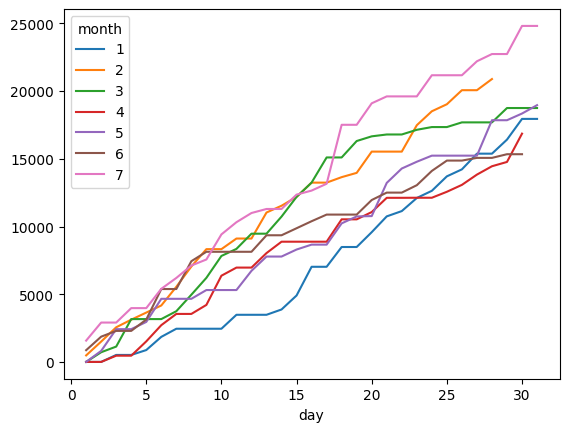

In [11]:
year_comparison(2023, 'South America', 'OECD Europe')

In [8]:
fs = fleet_metrics_client.get(
    metric=FleetMetricsAlgo.FloatingStorage,
    unit=FleetMetricsMeasurementUnit.BBL,
    period=FleetMetricsPeriod.Daily,
    split=FleetMetricsSplit.Total,
    floating_storage_duration_min='7',
    floating_storage_duration_max='inf',
    products=['Crude/Condensate']
).set_index('Date')

In [10]:
%matplotlib inline

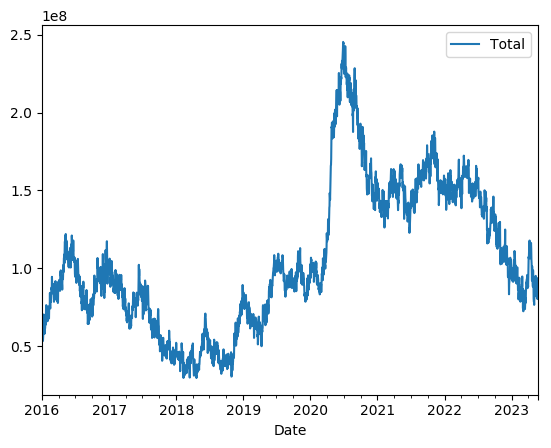

In [11]:
fs.plot()

In [20]:
tsa.update('crude.kpler.oil_on_water.kbd.daily', oow['Total'], 'Syed Ahmad')

2016-01-01    1.005965e+09
2016-01-02    1.029083e+09
2016-01-03    1.016856e+09
2016-01-04    1.004534e+09
2016-01-05    9.959740e+08
2016-01-06    9.826355e+08
2016-01-07    9.796139e+08
2016-01-08    1.000595e+09
2016-01-09    9.987697e+08
2016-01-10    9.977942e+08
2016-01-11    1.006798e+09
2016-01-12    1.014294e+09
2016-01-13    1.005737e+09
2016-01-14    9.953772e+08
2016-01-15    9.967908e+08
2016-01-16    1.003017e+09
2016-01-17    1.014245e+09
2016-01-18    1.008355e+09
2016-01-19    1.014493e+09
2016-01-20    1.024458e+09
2016-01-21    1.016194e+09
2016-01-22    1.025330e+09
2016-01-23    1.029359e+09
2016-01-24    1.054367e+09
2016-01-25    1.041975e+09
2016-01-26    1.028912e+09
2016-01-27    1.015531e+09
2016-01-28    9.983971e+08
2016-01-29    1.010468e+09
2016-01-30    1.011486e+09
2016-01-31    1.021421e+09
2016-02-01    1.029468e+09
2016-02-02    1.031528e+09
2016-02-03    1.043186e+09
2016-02-04    1.021786e+09
2016-02-05    1.035359e+09
2016-02-06    1.036046e+09
2

In [12]:
oow.tail()

Date         Total
2627 2023-03-12  1.189521e+09
2628 2023-03-13  1.168941e+09
2629 2023-03-14  1.164073e+09
2630 2023-03-15  1.163395e+09
2631 2023-03-16  1.167427e+09

In [ ]:
threshold = dt.now() - relativedelta(months=1)
env = 'UAT'
# env = 'PROD'
if env == 'PROD':
    path = 'OIL'
else:
    path = 'OILUAT'

### ----- flows ------

In [21]:
egypt_imp = flows_client.get(
    with_intra_country=False,
    # from_zones=,
    to_zones='Egypt',
    products=['Crude/Condensate'],
    flow_direction=[FlowsDirection.Import],
    split=[FlowsSplit.Total],
    granularity=[FlowsPeriod.Monthly],
    unit=[FlowsMeasurementUnit.KBD],
    start_date=dt(2013,1,1)).drop(columns='Period End Date').set_index('Date')

egypt_exp = flows_client.get(
    with_intra_country=False,
    # from_zones=,
    from_zones='Egypt',
    products=['Crude/Condensate'],
    flow_direction=[FlowsDirection.Export],
    split=[FlowsSplit.Total],
    granularity=[FlowsPeriod.Monthly],
    unit=[FlowsMeasurementUnit.KBD],
    start_date=dt(2013,1,1)).drop(columns='Period End Date').set_index('Date')
egypt = pd.concat([egypt_imp,egypt_exp], axis=1)
egypt.columns = ['imports', 'exports']

In [28]:
x = egypt['imports']
y = egypt['exports']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                exports   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     169.8
Date:                Tue, 07 Feb 2023   Prob (F-statistic):           7.40e-25
Time:                        09:57:20   Log-Likelihood:                -829.12
No. Observations:                 124   AIC:                             1662.
Df Residuals:                     122   BIC:                             1668.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        203.2030     57.775      3.517      0.001      88.832     317.574
imports        0.7901      0.061     13.031      0.000       0.670       0.910
==============================================================================
Omnibus:                       11.778   Durbin-Watson:                   1.268
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               31.292
Skew:                          -0.142   Prob(JB):                     1.60e-07
Kurtosis:                       5.445   Cond. No.                     3.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
egypt.tail()

imports  exports
Date                     
2022-12  1034.98   936.66
2023-01  1163.90  1091.42
2023-02  1005.49   428.49
2023-03   838.29   133.91
2023-04   348.18     0.00

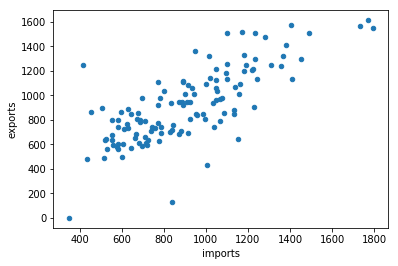

In [25]:
# egypt.plot(figsize=(20,10))
egypt.plot.scatter(x='imports', y='exports',)

In [ ]:
oecd_europe = ['Slovenia','Poland','Turkey','Denmark','Estonia','Finland','Iceland','Ireland','Norway','Sweden','United Kingdom','Albania','Greece','Italy','Portugal','Spain','Belgium','France','Germany','Netherlands']

In [ ]:
today = datetime.date.today()

In [ ]:
def clean_ts(df):
    df.drop(columns='Period End Date', inplace=True)
    df['Date'] = pd.to_datetime(df['Date'])
    return df

In [ ]:
def get_flows(origin=[], destination=[], direction='Import'):
    
    if direction == 'Import':
        flow = [FlowsDirection.Import]
        layer = [FlowsSplit.OriginTradingRegions]
    else:
        flow = [FlowsDirection.Export]
        layer = [FlowsSplit.DestinationTradingRegions]
    
    df = flows_client.get(
    with_intra_country=False,
    from_zones=origin,
    to_zones=destination,
    products=['Crude/Condensate'],
    flow_direction=flow,
    split=layer,
    granularity=[FlowsPeriod.Monthly],
    unit=[FlowsMeasurementUnit.KBD],
    start_date=date(2013,1,1),
#     end_date=today,
    )
    return df

In [ ]:
def get_single_flow(origin=[], destination=[], direction='Import'):
    
    if direction == 'Import':
        flow = [FlowsDirection.Import]
    else:
        flow = [FlowsDirection.Export]
    
    df = flows_client.get(
    with_intra_country=False,
    from_zones=origin,
    to_zones=destination,
    products=['Crude/Condensate'],
    flow_direction=flow,
    split=[FlowsSplit.Total],
    granularity=[FlowsPeriod.Monthly],
    unit=[FlowsMeasurementUnit.KBD],
    start_date=date(2013,1,1),
#     end_date=today,
    )
    return df

In [ ]:
exports = clean_ts(get_single_flow(origin=oecd_europe, destination=['americas', 'africa', 'asia'], direction='Export'))
# imports = get_flows(destination=oecd_europe, direction='Import')

In [ ]:
exports.set_index('Date', inplace=True)

In [ ]:
test_df = get_flows(destination=oecd_europe, direction='Import')

In [ ]:
short_cols = [
    'trade_id',
    'shipment_id',
    'status',
    'vessel_imo',
    "vessel_name",
    'vessel_name_2',
    'vessel_name_3',
    'closest_ancestor_group',
    "closest_ancestor_product",
    "closest_ancestor_grade",
    'closest_ancestor_grade_api',
    'closest_ancestor_grade_sulfur',
    'cargo_origin_barrels_split_by_product',
    "start",
    "end",
    "origin_location_name",
    'installation_origin_name',
    'origin_country_name',
    'zone_origin_name',
    'origin_subcontinent_name',
    'continent_origin_name',
    'next_forecasted_origin_location_name',
    'next_forecasted_origin_eta',
    'initial_seller_name',
    'charterer_name',
    "destination_location_name",
    'next_forecasted_destination_location_name',
    'next_forecasted_destination_location_eta',
    'installation_destination_name',
    'destination_country_name',
    'zone_destination_name',
    'destination_subcontinent_name',
    'continent_destination_name',
    'final_buyer_name',
    'origin_eta_source',
    'destination_eta_source',
    'cargo_sources'
]

### ----- regular job ------

In [ ]:
all_cargoes = trades_client.get(
with_forecast=True,
with_intra_country=False,
start_date=threshold,
columns=['all']
)

In [ ]:
all_cargoes = all_cargoes.replace(',','_', regex=True)
all_cargoes = all_cargoes.replace("'"," ", regex=True)

In [ ]:
today = dt.now().date().strftime('%y-%m-%d')
all_cargoes.to_csv('//petroineos.local/dfs/Department Private Folders\Analysis Department/Crude/kpler data/scrape/Upload_{}_KplerTrades-{}.csv'.format(env, today), index=False)

### ----- ad hoc ------

In [ ]:
ad_hoc = trades_client.get(
#     from_zones=['Novorossiysk', 'Primorsk', 'Ust-luga'],
products="Patos Marinza",
with_forecast=False,
with_intra_country=False,
start_date=dt(2013,1,1),
columns=short_cols
)

In [ ]:
ad_hoc.columns

Index(['trade_id', 'shipment_id', 'status', 'vessel_imo', 'vessel_name',
       'vessel_name_2', 'vessel_name_3', 'closest_ancestor_group',
       'closest_ancestor_product', 'closest_ancestor_grade',
       'closest_ancestor_grade_api', 'closest_ancestor_grade_sulfur',
       'cargo_origin_barrels_split_by_product', 'start', 'end',
       'origin_location_name', 'installation_origin_name',
       'origin_country_name', 'zone_origin_name', 'origin_subcontinent_name',
       'continent_origin_name', 'next_forecasted_origin_location_name',
       'next_forecasted_origin_eta', 'initial_seller_name', 'charterer_name',
       'destination_location_name',
       'next_forecasted_destination_location_name',
       'next_forecasted_destination_location_eta',
       'installation_destination_name', 'destination_country_name',
       'zone_destination_name', 'destination_subcontinent_name',
       'continent_destination_name', 'final_buyer_name', 'origin_eta_source',
       'destination_eta_sour

In [ ]:
ad_hoc.to_excel('patos_marinza.xlsx', index=False)

### ------------ data cleaning ---------------------

In [ ]:
all_cargoes.columns.to_list()

In [ ]:
dataTypeDict = dict(all_cargoes.dtypes)
dataTypedf = pd.DataFrame(all_cargoes.dtypes)

In [ ]:
dataTypedf.to_csv('kpler_column_data_types.csv')

In [ ]:
dataTypedf

In [ ]:
two_year = trades_client.get(
with_forecast=True,
with_intra_country=False,
start_date=dt(2020,1,1),
columns=['all']
)

In [ ]:
two_year['initial_seller_name'].replace(',','_', inplace=True)

In [ ]:
def remove_special_symbols(df_col):
    df_col = remo_spec_symb(df_col, "'")
    df_col = remo_spec_symb(df_col, '"')
    df_col = remo_spec_symb(df_col, ',')
    return df_col


def remo_spec_symb(df_col, symb):
    #print("replacing: " + symb)
    try:
        df_col = df_col.str.replace(symb, '')
    except:
        df_col = df_col
    return df_col

In [ ]:
# all_history = pd.read_csv('I:/Analysis Department/Crude/kpler data/scrape/kpler_full_history.csv')

In [ ]:
col_names_all = all_cargoes.columns.to_list()

In [ ]:
measurer = np.vectorize(len)
res1 = measurer(two_year.values.astype(str)).max(axis=0)

In [ ]:
lengths = pd.DataFrame([col_names_all,res1])
lengths.to_csv('kpler_col_lengths.csv', index=False)

In [ ]:
long_strings = ['initial_seller_name',
'final_buyer_name',
'trade_link_1_seller_name',
'trade_link_1_buyer_name',
'trade_link_2_buyer_name',
'trade_link_3_buyer_name',
]

In [ ]:
# all_cargoes = all_cargoes.applymap(lambda x: str(x.replace(',','.')))

In [ ]:
# max(all_cargoes.initial_seller_name.map(str).apply(len))

In [ ]:
# all_cargoes[all_cargoes.eq(",").any(1)]

In [ ]:
# all_cargoes[(all_cargoes.values.ravel() == ",").reshape(all_cargoes.shape).any(1)]

In [ ]:
# remove_special_symbols(all_cargoes.final_buyer_name).to_list()

In [ ]:
# all_cargoes.final_buyer_name.str.replace(',','_').to_list()

In [ ]:
all_cargoes = all_cargoes.replace(value=',','_')

In [ ]:
all_cargoes.final_buyer_name.str.split(',').to_list()

### ------ with desired columns ------

In [ ]:
all_cargoes = trades_client.get(
with_forecast=True,
with_intra_country=False,
start_date=dt(2018,1,1),
columns=[
    'trade_id',
    'status',
    'vessel_imo',
    "vessel_name",
    'vessel_name_2',
    'vessel_name_3',
    'closest_ancestor_group',
    "closest_ancestor_product",
    "closest_ancestor_grade",
    'closest_ancestor_grade_api',
    'closest_ancestor_grade_sulfur',
    'cargo_origin_barrels_split_by_product',
    "start",
    "end",
    "origin_location_name",
    'installation_origin_name',
    'origin_country_name',
    'zone_origin_name',
    'origin_subcontinent_name',
    'continent_origin_name',
    'next_forecasted_origin_location_name',
    'next_forecasted_origin_eta',
    'initial_seller_name',
    'charterer_name',
    "destination_location_name",
    'next_forecasted_destination_location_name',
    'next_forecasted_destination_location_eta',
    'installation_destination_name',
    'destination_country_name',
    'zone_destination_name',
    'destination_subcontinent_name',
    'continent_destination_name',
    'final_buyer_name',
    'origin_eta_source',
    'destination_eta_source',
    'cargo_sources'
]
)

# one off historical

In [ ]:
all_cargoes = trades_client.get(
with_forecast=True,
with_intra_country=False,
# start_date=dt(2018,1,1),
columns=['all']
)

In [ ]:
all_cargoes.to_csv('I:/Analysis Department/Crude/kpler data/scrape/kpler_full_history.csv', index=False)

In [ ]:
all_cargoes.rename(columns={'start':'voyage_start', 'end';'voyage_end'}, inplace=True)

### -------- oil in transit -------------

In [ ]:
from kpler.sdk.resources.fleet_metrics import FleetMetrics
from kpler.sdk import FleetMetricsAlgo, FleetMetricsSplit, FleetMetricsPeriod
fleet_metrics_client = FleetMetrics(config)
df = fleet_metrics_client.get(
    metric=FleetMetricsAlgo.LoadedVessels,
#     zones=["China"],
    period=FleetMetricsPeriod.Daily,
    split=FleetMetricsSplit.Total,
    start_date=dt(2021,1,1),
    products='Crude'
)

In [ ]:
# df.to_csv('kpler.csv')

In [ ]:
df.plot(kind='line', x='Date', y='Total', figsize=(20,10))

# flows from API

In [34]:
oecd_imports = clean_ts(flows_client.get(
    from_zones=["13,6807,110608,235,241,243,112932,337,343,6734,517,537,110654,561,605,751,757,110691,941,151,61,7,23,675"],
    to_zones=["3790"],
    flow_direction = [FlowsDirection.Import],
    with_intra_country=False,
    split = [FlowsSplit.Total],
    unit=[FlowsMeasurementUnit.KBD],
    start_date=date(2013,1,1),
    granularity=[FlowsPeriod.Monthly]
    
)).set_index('Date')

In [33]:
df

Date    Total
0   2013-01-01  6061.69
1   2013-02-01  6628.85
2   2013-03-01  6985.94
3   2013-04-01  7073.49
4   2013-05-01  6955.74
..         ...      ...
111 2022-04-01  7354.93
112 2022-05-01  7975.26
113 2022-06-01  5720.25
114 2022-07-01  1110.70
115 2022-08-01   560.56

[116 rows x 2 columns]

# flows from DB

In [3]:
def ag_get_data(query):
    warnings.simplefilter('ignore', requests.packages.urllib3.exceptions.InsecureRequestWarning)
    params = {"Database": "OIL", "Query": query}
    resp = requests.post('https://TST-QDEV-AP1.petroineos.local:5001/genericdata/Fetch/', json=params, verify=False)
    json_result = resp.json()
    df = pd.DataFrame(json_result)
    return df

In [4]:
# def convert_to_datime(df):
#     df['voyage_start'] = pd.to_datetime(df['voyage_start'])
#     df['voyage_end'] = pd.to_datetime(df['voyage_end'])
#     return df

In [5]:
# def aggregate_to_monthly(df, col):
#     df['month'] = df[col].dt.date
#     df.set_index('date', inplace=True)
#     df_grouped = df.groupby(['date']).resample('MS').sum(['cargo_origin_barrels_split_by_product'])
#     return df_grouped

In [6]:
oecd_europe = ('Slovenia','Poland','Turkey','Denmark','Estonia','Finland','Iceland','Ireland','Norway','Sweden','United Kingdom','Albania','Greece','Italy','Portugal','Spain','Belgium','France','Germany','Netherlands')

In [6]:
oecd_exports_query = f'''select voyage_start date, sum(cargo_origin_barrels_split_by_product) volume from oil.dbo.KplerTrades 
where origin_country_name in {oecd_europe} and destination_country_name not in {oecd_europe}
group by voyage_start
order by voyage_start desc
'''

In [7]:
oecd_imports_query = f'''select voyage_end date, sum(cargo_origin_barrels_split_by_product) volume from oil.dbo.KplerTrades 
where origin_country_name not in {oecd_europe} and destination_country_name in {oecd_europe}
group by voyage_end
order by voyage_end desc
'''

In [8]:
def aggregate_daily_kbd(df):
    df.index = pd.to_datetime(df.date)
    df_grouped = df.resample('D').sum().astype(float)
    return df_grouped

In [9]:
def aggregate_monthly_kbd(df):
    df.index = pd.to_datetime(df.date)
    df_grouped = df.resample('MS').sum().astype(float)
    df_grouped['volume'] = df_grouped['volume']/(df_grouped.index.daysinmonth*1000)
    return df_grouped['volume']

In [265]:
oecd_exports_ts = aggregate_monthly_kbd(ag_get_data(oecd_exports_query))

In [10]:
oecd_import_ts = aggregate_monthly_kbd(ag_get_data(oecd_imports_query))

In [13]:
oecd_import_ts.tail(10)

date
2021-12-01    6967.716355
2022-01-01    6650.017290
2022-02-01    7629.742393
2022-03-01    6848.934226
2022-04-01    7210.605300
2022-05-01    7806.409871
2022-06-01    5747.466200
2022-07-01    1075.745839
2022-08-01     529.470323
2022-09-01     100.582833
Freq: MS, Name: volume, dtype: float64

In [37]:
comparison = oecd_imports.merge(oecd_import_ts, left_index=True, right_index=True)

In [38]:
comparison['delta'] = comparison['volume'] - comparison['Total']

<AxesSubplot:>

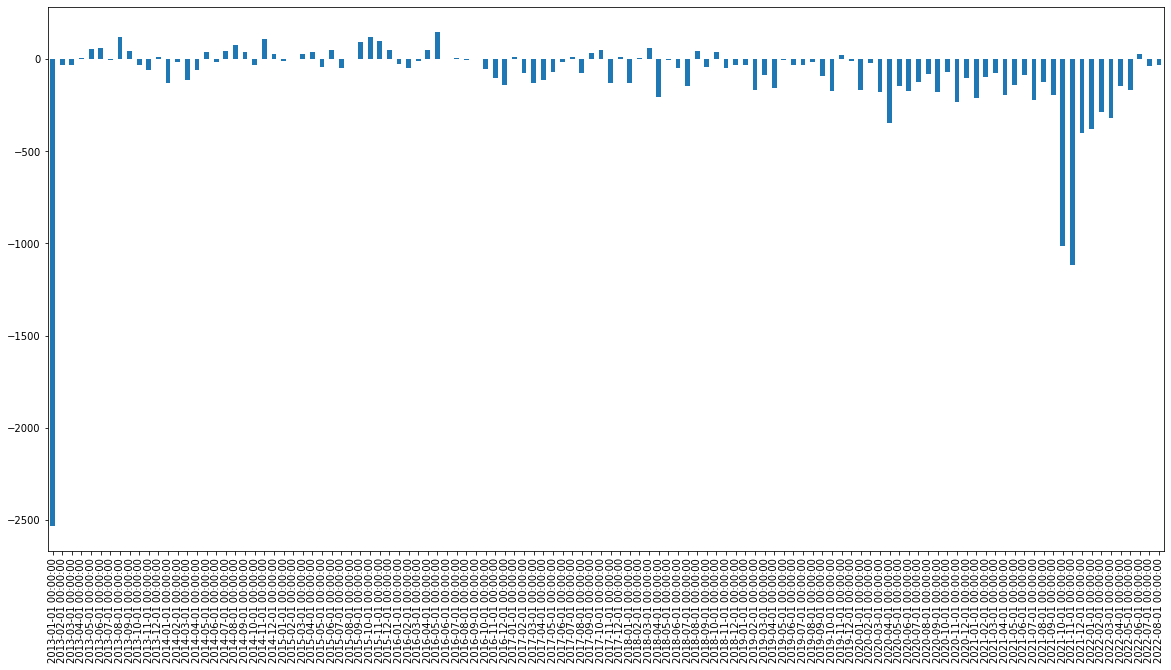

In [40]:
comparison['delta'].plot(kind='bar', figsize=(20,10))

In [272]:
comparison.to_csv('check.csv')

## flows vs trades comparison 

In [152]:
def aggregate_monthly_kbd_trades(df):
#     df.index = pd.to_datetime(df.date)
    df_grouped = df.resample('MS').sum().astype(float)
    df_grouped = df_grouped/(df_grouped.index.daysinmonth*1000)
    return df_grouped

In [153]:
def comparison(origin):
    ts = clean_ts(flows_client.get(
    from_zones=origin,
    to_zones=["3790"],
    flow_direction = [FlowsDirection.Import],
    with_intra_country=False,
    split = [FlowsSplit.Total],
    unit=[FlowsMeasurementUnit.KBD],
    start_date=date(2013,1,1),
    granularity=[FlowsPeriod.Monthly]
    ))
    
    trades_raw = trades_client.get(
    from_zones=origin,
    to_zones=["3790"],
    with_intra_country=False,
    start_date=date(2013,1,1),
    columns=short_cols
    )
    
    trades = aggregate_monthly_kbd_trades(trades_raw.groupby('end')['cargo_origin_barrels_split_by_product'].sum()).reset_index()
    trades.columns = ['Date', 'trades_kbd']
    
    comparison = ts.merge(trades, on='Date')
    comparison['delta'] = comparison['Total'] - comparison['trades_kbd']
#     comparison['delta'].plot(kind='bar', figsize=(20,10))
    
    return comparison

In [150]:
comparison_list = ['United States', 'West Africa', 'Middle east', 'Ceyhan', 'South America', 'Russian Federation', 'Libya', 'Algeria']

In [151]:
delta_list=[]
for c in comparison_list:
    delta = comparison(c)
    delta['origin']=c
    delta_list.append(delta)
deltas_df = pd.concat(delta_list)

In [85]:
deltas_pivot = deltas_df.pivot(columns='origin', values='delta', index='Date')

array([<AxesSubplot:title={'center':'Ceyhan'}, xlabel='Date'>,
       <AxesSubplot:title={'center':'Middle east'}, xlabel='Date'>,
       <AxesSubplot:title={'center':'South America'}, xlabel='Date'>,
       <AxesSubplot:title={'center':'United States'}, xlabel='Date'>,
       <AxesSubplot:title={'center':'West Africa'}, xlabel='Date'>],
      dtype=object)

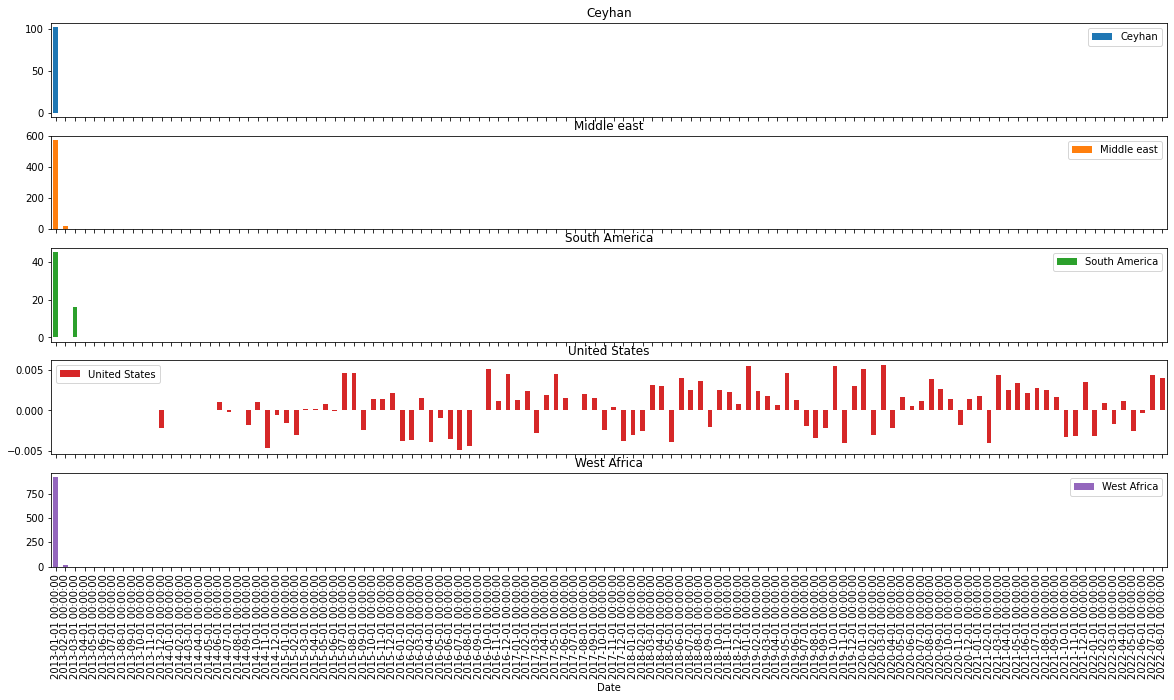

In [89]:
deltas_pivot.plot(kind='bar', subplots=True, figsize=(20,10))

## flows vs DB comparison 

In [105]:
def ag_get_data(query):
    warnings.simplefilter('ignore', requests.packages.urllib3.exceptions.InsecureRequestWarning)
    params = {"Database": "OIL", "Query": query}
    resp = requests.post('https://TST-QDEV-AP1.petroineos.local:5001/genericdata/Fetch/', json=params, verify=False)
    json_result = resp.json()
    df = pd.DataFrame(json_result)
    return df

In [106]:
oecd_europe = ('Slovenia','Poland','Turkey','Denmark','Estonia','Finland','Iceland','Ireland','Norway','Sweden','United Kingdom','Albania','Greece','Italy','Portugal','Spain','Belgium','France','Germany','Netherlands')

In [114]:
def aggregate_monthly_kbd_db(df):
    df.index = pd.to_datetime(df.date)
    df_grouped = df.resample('MS').sum().astype(float)
    df_grouped['volume'] = df_grouped['volume']/(df_grouped.index.daysinmonth*1000)
    return df_grouped

In [197]:
def aggregate_daily_kbd(df):
    df.index = pd.to_datetime(df.date)
    df_grouped = df.resample('D').sum().astype(float)
    return df_grouped['volume']

In [198]:
def db_country_imports(origin):
    country_imports_query = f'''select voyage_end date, sum(cargo_origin_barrels_split_by_product) volume from oil.dbo.KplerTrades 
    where origin_country_name = '{origin}' and destination_country_name in {oecd_europe}
    group by voyage_end
    order by voyage_end desc
    '''
    
    ts = aggregate_daily_kbd(ag_get_data(country_imports_query))
    return ts

In [199]:
test = db_country_imports('Nigeria')

In [200]:
test

date
2013-01-13    1052461.0
2013-01-14          0.0
2013-01-15          0.0
2013-01-16          0.0
2013-01-17     515424.0
                ...    
2022-06-29     611275.0
2022-06-30          0.0
2022-07-01          0.0
2022-07-02          0.0
2022-07-03    1040686.0
Freq: D, Name: volume, Length: 3459, dtype: float64

In [159]:
def db_subcont_imports(origin):
    imports_query = f'''select voyage_end date, sum(cargo_origin_barrels_split_by_product) volume from oil.dbo.KplerTrades 
    where origin_subcontinent_name = '{origin}' and destination_country_name in {oecd_europe}
    group by voyage_end
    order by voyage_end desc
    '''
    
    ts = aggregate_monthly_kbd_db(ag_get_data(imports_query))
    return ts

In [163]:
def comparison_db(layer, origin):
    
    ts = clean_ts(flows_client.get(
    from_zones=origin,
    to_zones=["3790"],
    flow_direction = [FlowsDirection.Import],
    with_intra_country=False,
    split = [FlowsSplit.Total],
    unit=[FlowsMeasurementUnit.KBD],
    start_date=date(2013,1,1),
    granularity=[FlowsPeriod.Monthly]
    )).set_index('Date')
    
    if layer == 'country':
        db = db_country_imports(origin)
    else:
        db = db_subcont_imports(origin)
    
    comparison= ts.merge(db, left_index=True, right_index=True)
    comparison['delta'] = comparison['volume'] - comparison['Total']
    return comparison

In [164]:
def plot_diffs(layer, c_list):
    delta_list=[]
    for c in c_list:
        delta = comparison_db(layer, c)
        delta['origin']=c
        delta_list.append(delta)
    deltas_df = pd.concat(delta_list)
    deltas_pivot = deltas_df.pivot(columns='origin', values='delta')
    deltas_pivot.plot(kind='bar', subplots=True, figsize=(15,15))
    return deltas_pivot

In [209]:
country_list = ['United States','Nigeria', 'Brazil', 'Russian Federation', 'Libya', 'Algeria', 'Saudi Arabia', 'Iraq', 'Kuwait']
region_list = ['Western Africa', 'South America', 'Northern America', 'Northern Africa', 'Middle East']

In [214]:
def clean_names(str_list):
    new_list=[]
    for i in range(len(str_list)):
        new_list.append(str_list[i].lower())
        new_list[i] = new_list[i].replace(' ','_')
    return new_list

In [215]:
n = clean_names(country_list)

In [217]:
country_list

['United States',
 'Nigeria',
 'Brazil',
 'Russian Federation',
 'Libya',
 'Algeria',
 'Saudi Arabia',
 'Iraq',
 'Kuwait']

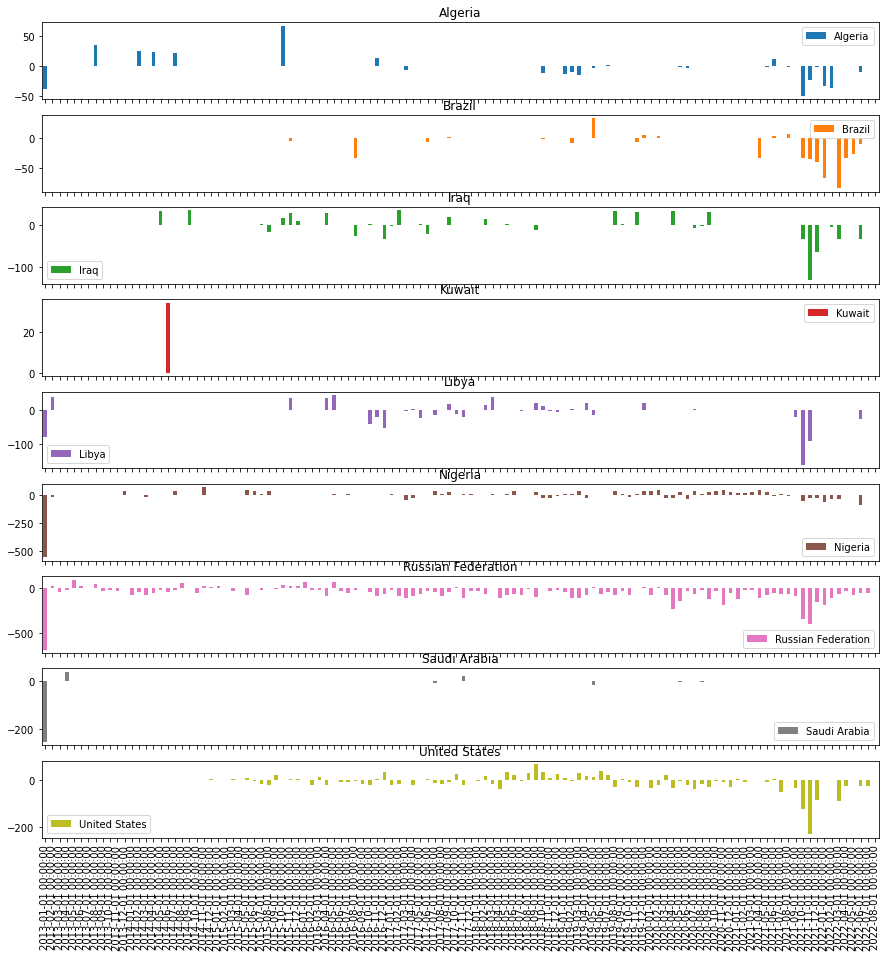

In [165]:
db_diffs = plot_diffs('country', country_list)

In [156]:
db_diffs['2014':].plot(kind='bar', subplots=True, figsize=(15,15))

array([<AxesSubplot:title={'center':'Algeria'}>,
       <AxesSubplot:title={'center':'Brazil'}>,
       <AxesSubplot:title={'center':'Libya'}>,
       <AxesSubplot:title={'center':'Nigeria'}>,
       <AxesSubplot:title={'center':'Russian Federation'}>,
       <AxesSubplot:title={'center':'United States'}>], dtype=object)

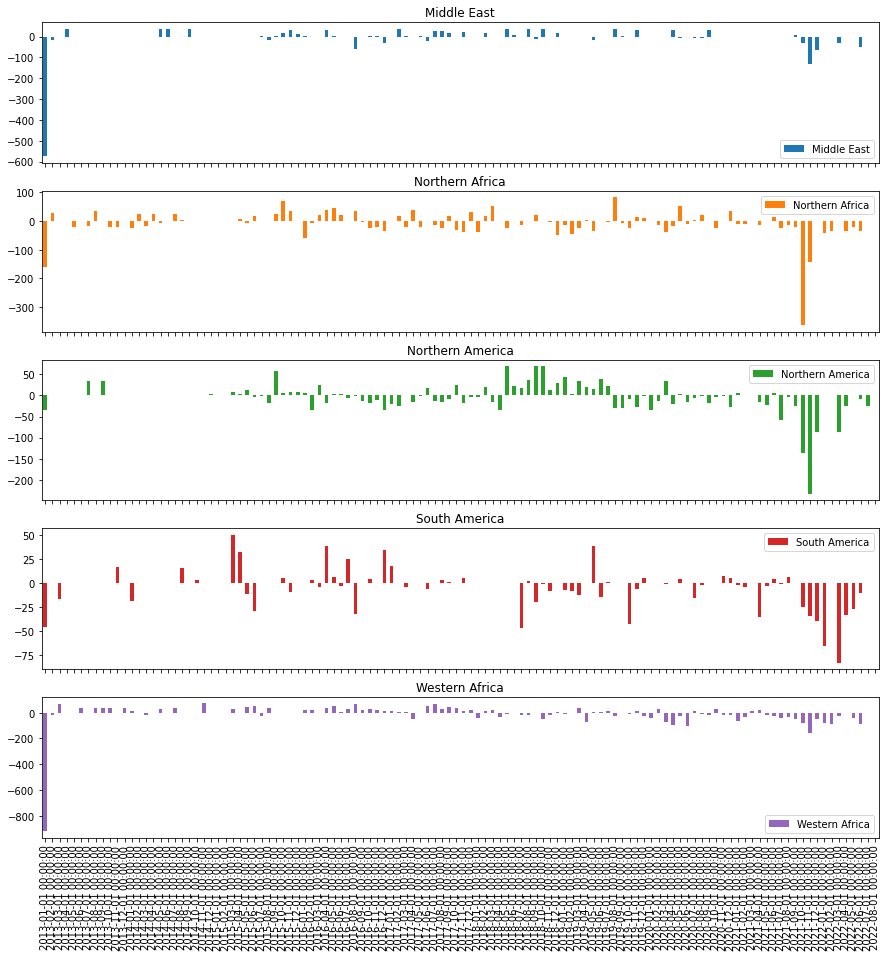

In [172]:
db_diffs_subcont = plot_diffs('subcont', region_list)

array([<AxesSubplot:title={'center':'Middle East'}>,
       <AxesSubplot:title={'center':'Northern Africa'}>,
       <AxesSubplot:title={'center':'Northern America'}>,
       <AxesSubplot:title={'center':'South America'}>,
       <AxesSubplot:title={'center':'Western Africa'}>], dtype=object)

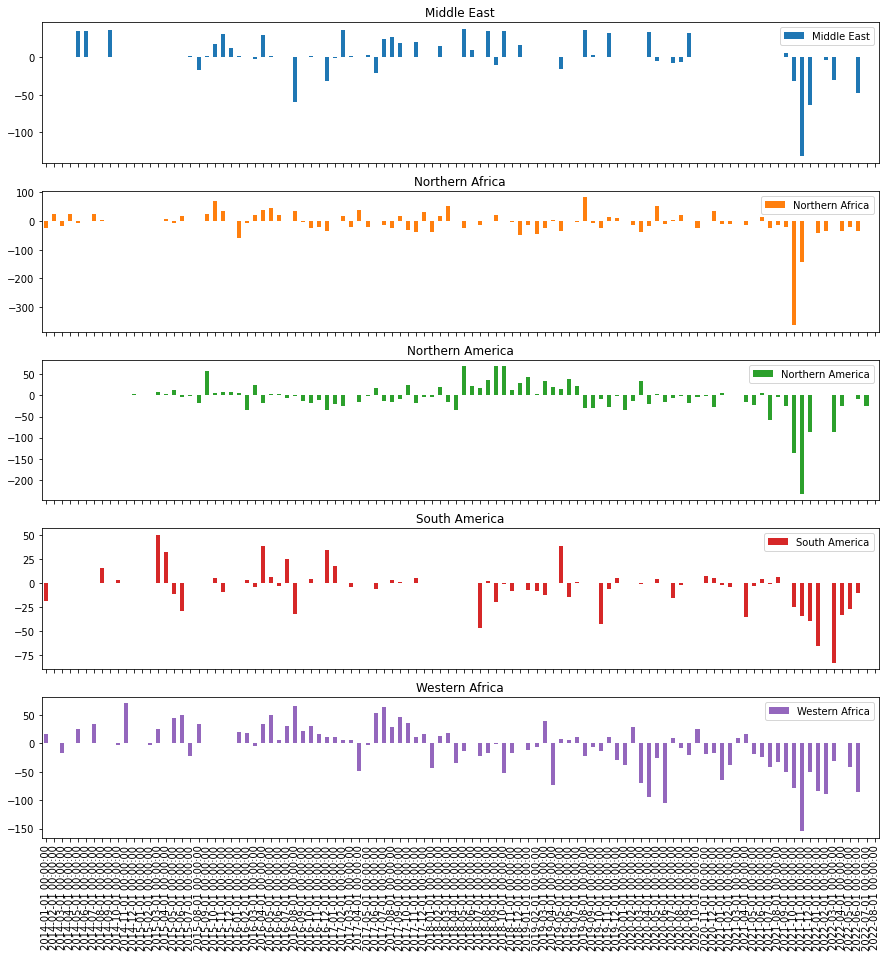

In [173]:
db_diffs_subcont['2014':].plot(kind='bar', subplots=True, figsize=(15,15))

In [ ]:
test = ag_get_data()

## CPC regressions / flow regressions

In [1]:
% matplotlib inline

UsageError: Line magic function `%` not found.


In [5]:
from tshistory.api import timeseries
import statsmodels.api as sm

In [6]:
# testing with args
def get_flow(prod=['Crude/Condensate'], dest='3790', origin=[]):
    df = flows_client.get(
    with_intra_country=False,
    products=prod,
    to_zones=dest,
    from_zones=origin,
    flow_direction=[FlowsDirection.Import],
    split=[FlowsSplit.Total],
    granularity=[FlowsPeriod.Monthly],
    unit=[FlowsMeasurementUnit.KBD],
    start_date=date(2013,1,1),
#     end_date=today,
    )
    df.drop(columns='Period End Date', inplace=True)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    return df

In [94]:
def seasonal_plot(df1):
    df=df1.copy()
    df['year'] = df.index.year
    df['month'] = df.index.month
    df.reset_index(drop=True, inplace=True)
    df_new = df.pivot(columns='year', index='month', values='Total')
    df_new.drop(columns=2022, inplace=True)
    df_new.plot(figsize=(10,5))
    return df_new

In [95]:
cpc = get_flow(prod='CPC')

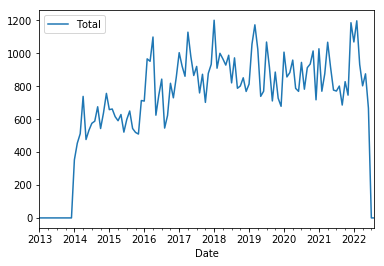

In [96]:
cpc.plot()

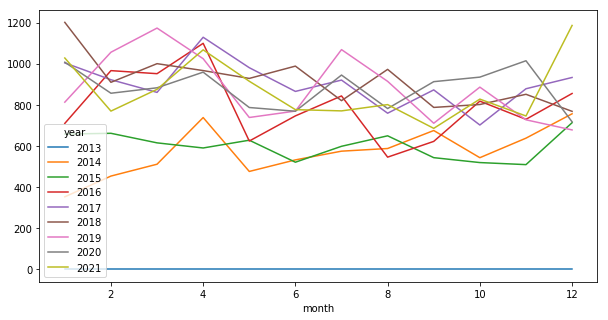

In [97]:
cpc_seaonal = seasonal_plot(cpc)

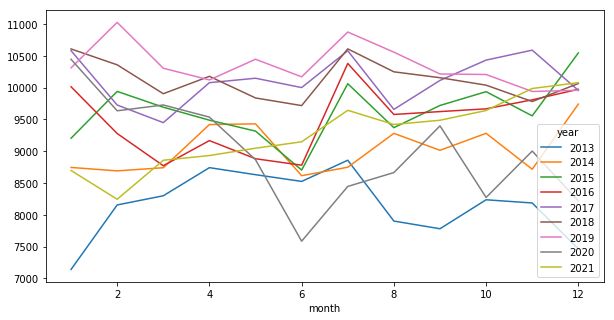

In [98]:
oecd_seasonal = seasonal_plot(get_flow())

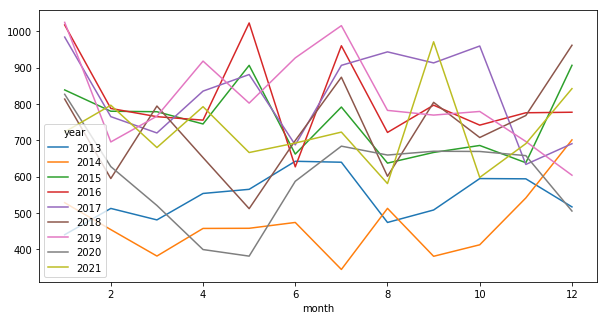

In [101]:
ceyhan = seasonal_plot(get_flow(origin='ceyhan'))

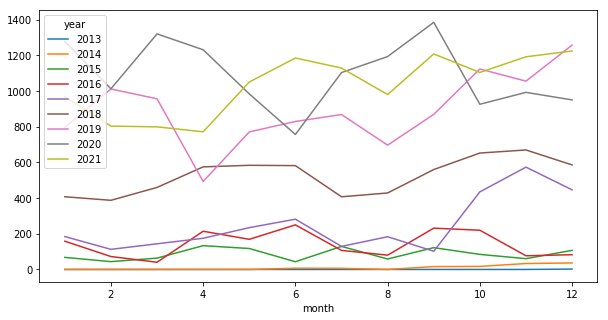

In [102]:
us = seasonal_plot(get_flow(origin='United States'))

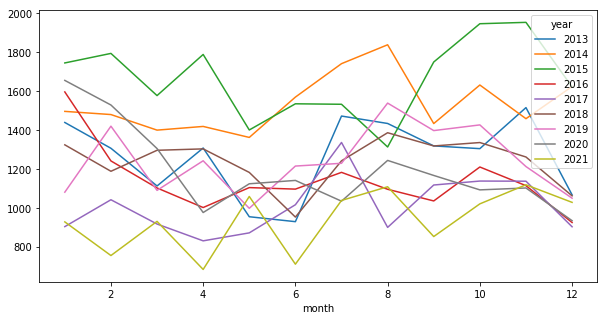

In [105]:
waf = seasonal_plot(get_flow(origin='West Africa'))

In [112]:
tsa = timeseries('http://tst-qdev-ap9.petroineos.local/api')

In [128]:
dubai = tsa.get('price.platts.dubai_swap.m01.usd_bbl.daily')
brent = tsa.get('price.platts.ice_brent_swap.m01.usd_bbl.daily')

In [127]:
dubai

In [117]:
dubai_curve.tail(300).to_csv('dubai_check.csv')

In [133]:
spread_df = pd.merge(brent, dubai, left_index=True, right_index=True)
spread_df['spread'] = spread_df[spread_df.columns[0]]-spread_df[spread_df.columns[1]]

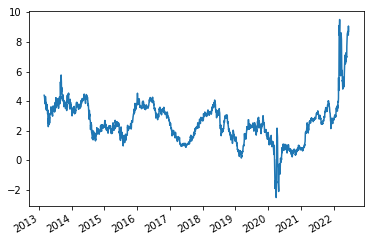

In [136]:
spread_df['spread'].plot()

In [137]:
spread_monthly = spread_df.resample('MS').mean()

In [139]:
spread_monthly['spread'].plot()

In [141]:
spread_monthly['spread']

2013-03-01    3.917500
2013-04-01    2.935714
2013-05-01    3.239524
2013-06-01    3.468000
2013-07-01    3.883636
                ...   
2022-02-01    3.932000
2022-03-01    7.664783
2022-04-01    5.402632
2022-05-01    7.013810
2022-06-01    8.633750
Freq: MS, Name: spread, Length: 112, dtype: float64

In [146]:
corr = pd.merge(get_flow(origin='United States'),spread_monthly['spread'], left_index=True, right_index=True)

In [147]:
corr

Total    spread
2013-03-01     0.00  3.917500
2013-04-01     0.00  2.935714
2013-05-01     0.00  3.239524
2013-06-01     0.00  3.468000
2013-07-01     0.00  3.883636
...             ...       ...
2022-02-01  1375.67  3.932000
2022-03-01  1253.15  7.664783
2022-04-01  1345.19  5.402632
2022-05-01  1485.50  7.013810
2022-06-01  1418.81  8.633750

[112 rows x 2 columns]

In [148]:
x = corr['Total']
y = corr['spread']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 spread   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.223
Date:                Fri, 17 Jun 2022   Prob (F-statistic):              0.271
Time:                        10:04:38   Log-Likelihood:                -199.02
No. Observations:                 112   AIC:                             402.0
Df Residuals:                     110   BIC:                             407.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7546      0.199     13.831      0.000       2.360       3.149
Total         -0.0003      0.000     -1.106      0.271      -0.001       0.000
==============================================================================
Omnibus:                       40.259   Durbin-Watson:                   0.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.464
Skew:                           1.289   Prob(JB):                     8.46e-26
Kurtosis:                       7.254   Cond. No.                     1.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### north america imports forecast

In [7]:
import os
# DataGenic module
from pymarketdata.datagenic import DataGenic

# username = os.environ.get('DG_USERNAME')
# password = os.environ.get('DG_PASSWORD')
username = 'PIT018'
password = 'PIT018$1'

#prod
dg_url = "http://petro.datagenic.net:8080/"
dg = DataGenic(dg_url)
dg.connect(username, password)
print(f"DataGenic: {dg.version}")

DataGenic: Version 4.4.17.0.153, Built on 23-02-2022 05:43


In [13]:
na_imp = get_flow('North America')

In [61]:
def get_us_exp(prod=['Crude/Condensate'], origin='Northern America'):
    df = flows_client.get(
    with_intra_country=False,
    products=prod,
    from_zones=origin,
    flow_direction=[FlowsDirection.Export],
    split=[FlowsSplit.DestinationContinents],
    granularity=[FlowsPeriod.Monthly],
    unit=[FlowsMeasurementUnit.KBD],
    start_date=date(2013,1,1),
#     end_date=today,
    )
    df.drop(columns=['Period End Date','Unknown', 'Oceania', 'Africa', 'Americas'], inplace=True)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    return df

In [81]:
us_exp = get_us_exp(origin='United States')

In [82]:
us_exp['total'] = us_exp.sum(axis=1)

In [85]:
us_exp['Asia'] = us_exp['Asia']/us_exp['total']
us_exp['Europe'] = us_exp['Europe']/us_exp['total']

In [45]:
brent_M2 = 'model://ICE_BRENT/EU.OIL.NSEA.ICE.BRENT.FUT.M02'
brent_M2 = dg.get_time_series(brent_M2, datetime.date(2018,1,1), datetime.date.today())
brent_M2.rename(columns={'PRICE':'brent'}, inplace=True)
wti_m1 = dg.get_time_series('model://CMENYMCL_REL/US.NYMEX.CME.ELECTRONIC.FUT.CL.M01', datetime.date(2018,1,1), datetime.date.today())
wti_m1.rename(columns={'PRICE':'wti'}, inplace=True)

In [46]:
spread = pd.merge(brent_M2, wti_m1, left_index=True, right_index=True)
spread['spread'] = spread['brent'] - spread['wti']

<AxesSubplot:>

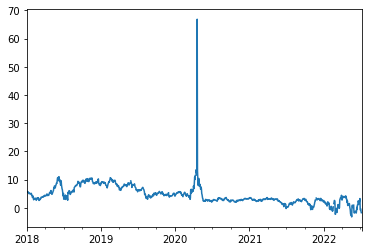

In [47]:
spread['spread'].plot()

In [48]:
spread_m = spread.resample('MS').mean()

<AxesSubplot:>

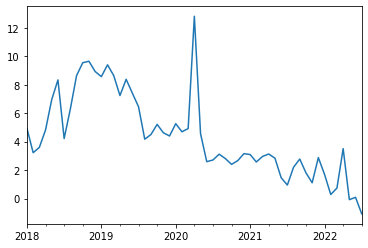

In [49]:
spread_m['spread'].plot()

In [50]:
corr = spread_m.merge(na_imp, left_index=True, right_index=True)

In [51]:
corr.to_csv('test.csv')

In [ ]:
# us production from TSA

In [8]:
tsa = timeseries('http://tst-qdev-ap9.petroineos.local/api')

In [9]:
us_prod = tsa.get('crude.rystad.united_states.production.kbd.monthly')

In [10]:
us_prod.head()

2010-01-01    5385.825
2010-02-01    5517.773
2010-03-01    5479.698
2010-04-01    5339.065
2010-05-01    5321.573
Name: crude.rystad.united_states.production.kbd.monthly, dtype: float64